In [1]:
from datahandler import *
from playground import *
from gui import *
from torchutils import *
from models import *
from torch.utils.data import WeightedRandomSampler
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
data = None
if not os.path.exists('./BTCUSDT_DB.csv'):
    data = pd.read_csv("BTCUSDT_1m.csv")
    data = get_dollar_bars(data)
    data.to_csv('./BTCUSDT_DB.csv', sep=',')
else:
    data = pd.read_csv('./BTCUSDT_DB.csv', sep=',')

handler = NewDataHandler(dataset=data)

In [4]:
crossover_horizon = 3

In [5]:
ma1, ma2 = 5, 10
handler.data = ma_crossover_labelling(handler.data, ma1, ma2, crossover_horizon)

handler.add_indicators([Indicators.RSI, Indicators.MACD,
                       Indicators.ADX, Indicators.OBV, Indicators.TICK_DENSITY])

handler.create_var_indicator([Indicators.RSI, Indicators.MACD, Indicators.ADX, Indicators.OBV, Indicators.PERC_RET,
                              Indicators.TICK_DENSITY])

# display(handler.data[handler.data.isnull().any(axis=1)]) # Displaying all the rows that contain missing values to see if they are spread across the dataframe

handler.data.replace([np.inf, -np.inf], 0, inplace=True)

# handler.standardize_data()

handler.data.dropna(axis=0, inplace=True)

handler.create_predict_data()

predict_data = handler.predict_data
predict_data['Target'] = handler.data['Label']
predict_data[f'MA{ma1} Var'], predict_data[f'MA{ma2} Var'] = handler.data[f'MA{ma1} Var'], handler.data[f'MA{ma2} Var']
predict_data[f'MA{ma1} UP'], predict_data[f'MA{ma2} UP'] = (handler.data[f'MA{ma1}'] > handler.data[f'MA{ma2}']) * 1, (handler.data[f'MA{ma1}'] < handler.data[f'MA{ma2}']) * 1
predict_data.reset_index(drop=True, inplace=True)

Could not add indicator OBV
Error message 'Volume'
Ignoring indicator OBV. Reason: Not found in the list of indicators


C:\Users\Alexis\AppData\Local\Temp\ipykernel_3644\3859535023.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['Target'] = handler.data['Label']
C:\Users\Alexis\AppData\Local\Temp\ipykernel_3644\3859535023.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data[f'MA{ma1} Var'], predict_data[f'MA{ma2} Var'] = handler.data[f'MA{ma1} Var'], handler.data[f'MA{ma2} Var']
C:\Users\Alexis\AppData\Local\Temp\ipykernel_3644\3859535023.py:22: SettingWithCopyWarning: 
A value is trying to be 

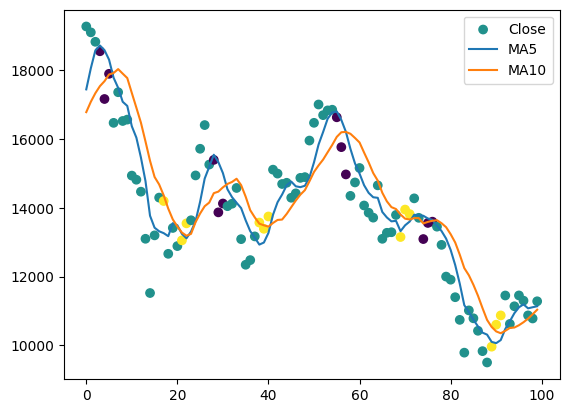

In [6]:
plt.scatter(range(100), handler.data['Close'][0:100], c=handler.data['Label'][0:100], label="Close")
plt.plot(range(100), handler.data[f'MA{ma1}'][0:100], label=f"MA{ma1}")
plt.plot(range(100), handler.data[f'MA{ma2}'][0:100], label=f"MA{ma2}")
plt.legend()
plt.show()

In [7]:
predict_data

,Unix,RSI Var,MACD Var,MACD_H Var,ADX14 Var,-DM Var,+DM Var,TICK_DENSITY Var,PERC_RET,Target,MA5 Var,MA10 Var,MA5 UP,MA10 UP
0,1513428720000,0.048401,0.029123,-0.405401,0.015614,-0.081688,0.192699,0.140838,0.080168,0,0.039638,0.017862,1,0
1,1513501980000,-0.020026,0.005391,-0.265815,0.016594,-0.062304,-0.024363,0.123226,-0.008869,0,0.035187,0.017930,1,0
2,1513550040000,-0.033514,-0.015804,0.064192,-0.031174,0.580984,-0.112892,0.026073,-0.014388,0,0.028830,0.014729,1,0
3,1513582380000,-0.034835,-0.032725,0.305927,-0.028909,-0.060343,-0.060343,-0.059421,-0.014598,-1,0.007641,0.011799,1,0
4,1513633980000,-0.159429,-0.083628,0.757608,-0.067444,0.359299,-0.112219,0.010391,-0.074901,-1,-0.007263,0.008164,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35403,1685494260000,-0.042508,-0.166193,0.030259,-0.050863,0.071720,-0.086337,0.308642,-0.001955,0,-0.000941,0.000077,0,1
35404,1685503620000,-0.226515,-0.569444,0.438520,-0.031190,0.398161,-0.130232,0.087601,-0.012531,0,-0.002583,-0.001645,0,1
35405,1685508540000,-0.104327,-1.493299,0.301169,-0.009115,0.087438,-0.072791,0.000000,-0.006059,1,-0.003588,-0.002306,0,1
35406,1685509980000,-0.068728,2.953790,0.175832,0.007952,0.072847,-0.057475,-0.132590,-0.004004,1,-0.005413,-0.003355,0,1


In [8]:
seq_length = 15
dataset = TSDataset(predict_data, seq_length)

In [9]:
train_indices = range(0, round(0.7 * len(dataset)), int(seq_length / 3))
val_indices = range(round(0.7 * len(dataset)), round(0.9 * len(dataset)))
test_indices = range(round(0.9 * len(dataset)), len(dataset) - seq_length)

train_set = torch.utils.data.Subset(dataset, train_indices)
val_set = torch.utils.data.Subset(dataset, val_indices) # Validation set will be training set for Meta Labelling
test_set = torch.utils.data.Subset(dataset, test_indices)

In [10]:
label_distribution = (predict_data.loc[train_set.indices, 'Target'].value_counts() / predict_data.loc[train_set.indices, 'Target'].shape[0]).sort_index().to_list()
display(predict_data.loc[train_set.indices, 'Target'].value_counts())
label_distribution

Target
 0    3443
-1     765
 1     747
Name: count, dtype: int64

[0.15438950554994954, 0.6948536831483351, 0.15075681130171545]

In [11]:
class_weights = [1 / p for p in label_distribution]
print(class_weights)
weights = [class_weights[torch.argmax(label)] for _, label in train_set]
train_sampler = WeightedRandomSampler(weights=weights, num_samples=len(train_set), replacement=True)
# train_sampler = None

[6.477124183006536, 1.4391519024106882, 6.633199464524766]


In [12]:
input_size = dataset.size
hidden_size = 100
batch_size = 64
num_layers = 1
output_size = predict_data['Target'].unique().size
lstm_model = LSTMModel(input_size, hidden_size,
                       num_layers, output_size).to(device)

In [13]:
weights = torch.Tensor(label_distribution).to(device)
train_lstm(lstm_model, train_set, val_set, 30, 0.0001,
           batch_size, num_layers, hidden_size, device, train_sampler, class_weights=None, model_name=f'crossover_{seq_length}_to_{crossover_horizon}', save=True)

Epoch: 1/30 -- [2106/4955 (100.0%)]	Loss: 1.0964349340169857	Accuracy: 0.334	Time taken: 0.921875	Validation Loss: 1.0946396589279175 || Validation Accuracy: 0.152
Epoch: 2/30 -- [2106/4955 (100.0%)]	Loss: 1.0859351662489085	Accuracy: 0.414	Time taken: 0.859375	Validation Loss: 1.0859930515289307 || Validation Accuracy: 0.330
Epoch: 3/30 -- [2106/4955 (100.0%)]	Loss: 1.0377600261798272	Accuracy: 0.584	Time taken: 0.859375	Validation Loss: 1.1025162935256958 || Validation Accuracy: 0.272
Epoch: 4/30 -- [2106/4955 (100.0%)]	Loss: 0.9508000703958365	Accuracy: 0.614	Time taken: 0.921875	Validation Loss: 1.1458064317703247 || Validation Accuracy: 0.285
Epoch: 5/30 -- [2106/4955 (100.0%)]	Loss: 0.9178630090676821	Accuracy: 0.627	Time taken: 1.046875	Validation Loss: 1.1573392152786255 || Validation Accuracy: 0.290
Epoch: 6/30 -- [2106/4955 (100.0%)]	Loss: 0.900545555811662	Accuracy: 0.634	Time taken: 0.953125	Validation Loss: 1.1483508348464966 || Validation Accuracy: 0.294
Epoch: 7/30 -- [2

([1.0964349340169857,
  1.0859351662489085,
  1.0377600261798272,
  0.9508000703958365,
  0.9178630090676821,
  0.900545555811662,
  0.888808412429614,
  0.8779992147898062,
  0.8751249374487461,
  0.8636401631893256,
  0.8398705644485278,
  0.8371427555878957,
  0.8178651348138467,
  0.7986231247584025,
  0.792684154632764,
  0.7870718722160046,
  0.7735362985195258,
  0.7688703361230019,
  0.7539944106187576,
  0.7476436052566919,
  0.7441025376319885,
  0.7463548817695715,
  0.7407241242054181,
  0.7267577755145538,
  0.7307762794005566,
  0.7262751880364541,
  0.7151851249046814,
  0.7261702991448916,
  0.7250108940479083,
  0.7240619498949784],
 [0.33420787083753783,
  0.4143289606458123,
  0.5842583249243188,
  0.6141271442986882,
  0.6266397578203835,
  0.6339051463168517,
  0.6450050454086781,
  0.6577194752774975,
  0.6601412714429868,
  0.6716448032290615,
  0.699899091826438,
  0.7021190716448032,
  0.7336024217961655,
  0.7671039354187689,
  0.7763874873864783,
  0.77961654

In [14]:
eval_lstm(lstm_model, test_set, len(test_set), num_layers, hidden_size, device)

Accuracy : 0.7153802497162316 || Loss : 0.8297935128211975
Confusion matrix : 
[[ 513.   26.    0.]
 [ 502. 1520.  426.]
 [   0.   49.  488.]]


(tensor([[9.2369e-01, 7.6314e-02, 2.0246e-07],
         [3.1902e-05, 9.6548e-02, 9.0342e-01],
         [4.4097e-01, 5.5901e-01, 1.7641e-05],
         ...,
         [4.6945e-03, 9.7316e-01, 2.2143e-02],
         [2.4013e-03, 9.3842e-01, 5.9178e-02],
         [2.1603e-04, 4.2203e-01, 5.7776e-01]], device='cuda:0',
        grad_fn=<CatBackward0>),
 tensor([[0., 1., 0.],
         [0., 1., 0.],
         [1., 0., 0.],
         ...,
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 1., 0.]], device='cuda:0'))